In [3]:
%matplotlib inline
from matplotlib import rcParams

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Introduction to clustering

Clustering is a machine learning technique used to group unlabeled datapoints in groups called *clusters*. The grouping is done such that similar items are together in the same cluster and items in different clusters are dissimilar from each-other. Typically similarity is defined using a distance measure (Euclidean, cosine, etc). Common practical applications for clustering include: market segmentation, social network analysis, search result grouping, anomaly detection etc.


Two clustering methods will be explored in this notebook:

- K-means.
- Hierarchical clustering.

More methods can be found [here](https://scikit-learn.org/stable/modules/classes.html?highlight=cluster#module-sklearn.cluster).

#### To begin with
Get familiar with how clustering works by watching the videos in Resources A and reading the article in Resources B.


#### Resources: 

* A. Introduction to clustering:
    * https://www.youtube.com/watch?v=4cxVDUybHrI
    
    
* B. A Comprehensive Survey of Clustering Algorithms
    * https://link.springer.com/article/10.1007/s40745-015-0040-1 (Read everything until the section Traditional Clustering Algorithms. From the section Traditional Clustering Algorithms, read the first 2 subsections. You can skip Modern Traditional Clustering Algorithms.)



* C. K-means clustering:
     * https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
     
     * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)
     
     
* D. Hierarchical clustering:
    * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
    * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
    * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering 

### Subject comprehension 

To check your understanding, before moving further, answer the questions in your own words in the space below.

1. What is clustering?
2. What are the main steps in the standard process of clustering?
3. What is the Silhouette coefficient?
4. What are the two types of evaluation for a clustering algorithm and what is the difference between them?

1. Clustering: 
Le clustering est une technique d'apprentissage automatique non supervisée qui consiste à regrouper un ensemble de points de données en clusters de sorte que les points dans le même cluster soient plus similaires les uns aux autres qu'à ceux des autres clusters. L'objectif est de découvrir la structure inhérente aux données en identifiant des regroupements naturels.

2. Les principales étapes du processus standard de clustering incluent généralement :
- Prétraitement des données : Nettoyer les données, gérer les valeurs manquantes et mettre les caractéristiques à l'échelle pour assurer leur comparabilité.
- Choix de l'algorithme de clustering : Sélectionner un algorithme de clustering approprié tel que K-means, le clustering hiérarchique, DBSCAN, etc.
- Détermination du nombre de clusters : Décider du nombre optimal de clusters, souvent à l'aide de méthodes comme la méthode du coude ou l'analyse de silhouette.
- Application de l'algorithme de clustering : Exécuter l'algorithme choisi sur les données prétraitées.
- Évaluation des clusters : Évaluer la qualité des clusters à l'aide de métriques d'évaluation comme le coefficient de silhouette, l'indice de Davies-Bouldin, etc.
- Interprétation des résultats : Analyser les clusters formés pour obtenir des insights et prendre des décisions basées sur les modèles découverts.

3. Le coefficient de silhouette est une mesure utilisée pour évaluer la qualité d'un clustering. Il calcule à quel point un point de données est similaire à son propre cluster comparé aux autres clusters. Le coefficient varie de -1 à 1, où une valeur proche de 1 indique que le point est bien clusterisé, une valeur proche de 0 indique que le point est sur ou très proche de la frontière entre les clusters, et une valeur négative indique que le point pourrait avoir été assigné au mauvais cluster.

4.  Évaluation interne : Ce type d'évaluation évalue la qualité du clustering en se basant sur les données clusterisées sans référence externe. Des métriques comme le coefficient de silhouette, l'indice de Davies-Bouldin, et la somme des carrés intra-clusters (WCSS) sont couramment utilisées. L'évaluation interne se concentre sur la compacité et la séparation des clusters.
 Évaluation externe : Ce type d'évaluation compare les résultats du clustering à une vérité terrain ou référence externe. Des métriques comme l'indice de Rand ajusté (ARI), l'information mutuelle normalisée (NMI), et l'indice de Fowlkes-Mallows sont utilisées. L'évaluation externe mesure à quel point les résultats du clustering correspondent aux labels ou catégories pré-définis.
La différence principale entre elles est que l'évaluation interne repose uniquement sur les données clusterisées et ne nécessite aucune information externe, tandis que l'évaluation externe utilise des labels pré-définis pour évaluer la précision et la pertinence des clusters.








### Data acquisition

Load the data about bank clients from the *bank-full.csv* file into a pandas dataframe. Make the necessary imports.

In [13]:
# code here
df= pd.read_csv('E:/Clustering/data/bank-full.csv', sep=';')

Print a summary of the data as well as the first 5 rows.

In [14]:
# code here
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Preprocessing

To facilitate the computation of distances, keep only the numerical features in the dataset.

- Remove all non-numerical features, as well as the features related to the date.
- Make sure there are no missing values - if they exist, remove them.
- Normalize the new dataset (transform the data for multiple features to the same scale).
- Save the result in a dataframe *df_norm*

In [15]:
# code here
numeric_=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df= df.select_dtypes(include=numeric_)
df.drop(columns=["day"], inplace = True)
df.head(5)

,age,balance,duration,campaign,pdays,previous
0,58,2143,261,1,-1,0
1,44,29,151,1,-1,0
2,33,2,76,1,-1,0
3,47,1506,92,1,-1,0
4,33,1,198,1,-1,0


In [16]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


Plot histograms of features

In [17]:
# code here
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np


In [18]:
num_pipeline= Pipeline([('std_scaler', StandardScaler())])
scaled_features= num_pipeline.fit_transform(df)
scaled_features

array([[ 1.60696496,  0.25641925,  0.0110161 , -0.56935064, -0.41145311,
        -0.25194037],
       [ 0.28852927, -0.43789469, -0.41612696, -0.56935064, -0.41145311,
        -0.25194037],
       [-0.74738448, -0.44676247, -0.70736086, -0.56935064, -0.41145311,
        -0.25194037],
       ...,
       [ 2.92540065,  1.42959305,  3.37379688,  0.72181052,  1.43618859,
         1.05047333],
       [ 1.51279098, -0.22802402,  0.97014641,  0.39902023, -0.41145311,
        -0.25194037],
       [-0.37068857,  0.52836436,  0.39932797, -0.24656035,  1.4761376 ,
         4.52357654]])

In [19]:
df_norm= pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
df_norm.describe()

,age,balance,duration,campaign,pdays,previous
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,2.112250e-16,1.760208e-17,6.035001e-17,3.017500e-17,2.011667e-17,4.023334e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.081149e+00,-1.002478e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01
25%,-7.473845e-01,-4.237719e-01,-6.025167e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01
50%,-1.823406e-01,-3.002800e-01,-3.035165e-01,-2.465603e-01,-4.114531e-01,-2.519404e-01
75%,6.652252e-01,2.158743e-02,2.362370e-01,7.622994e-02,-4.114531e-01,-2.519404e-01
max,5.091402e+00,3.309478e+01,1.809470e+01,1.944365e+01,8.297431e+00,1.191360e+02


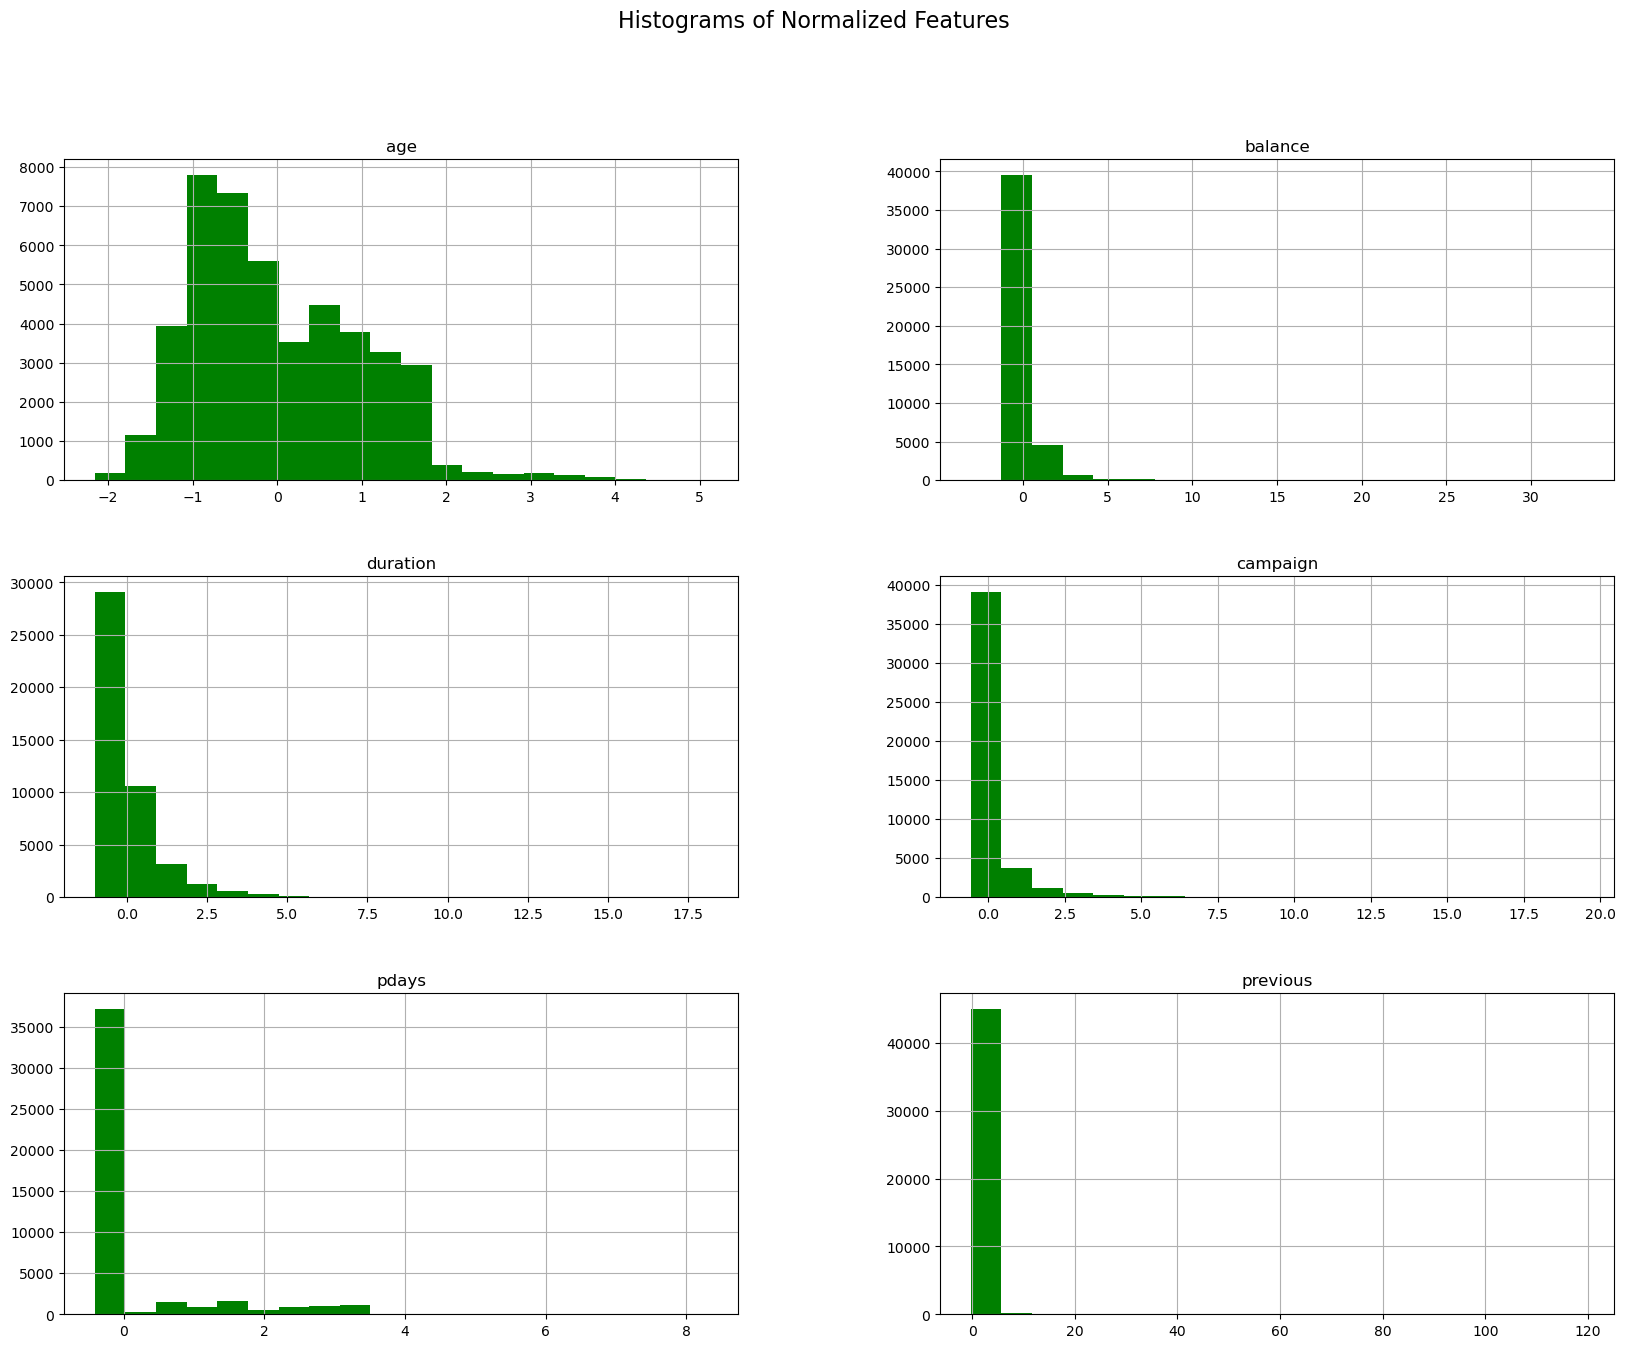

In [24]:
# Plot histograms for each normalized feature:
df_norm.hist(figsize=(20, 15), bins=20, color='green')
plt.suptitle('Histograms of Normalized Features', fontsize=16)
plt.show()

## KMeans


Let's warm up with the well known algorithm named KMeans!

Centroid-based clustering organizes the data into non-hierarchical clusters, contrarily to hierarchical clustering. KMeans is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. 


To better understand the way the algorithm works, read the documents and watch the video in Resources C:
* https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
* https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)


Then answer the below questions (in your own words):
1. What is a centroid?
2. How can you compute a centroid?
3. Are you supposed to know in advance the number of clusters in order to use the KMeans algorithm?


*Answer here*

#### Make the necessary imports from scikit learn in order to perform KMeans clustering

In [ ]:
# code here

#### Exploring KMeans with sklearn

The goal of this step is to become familiar with the sklearn clustering package and the silhouette analysis concepts.

Start by peforming a clustering of the data in *df_norm* into 5 clusters.

In [ ]:
# code here

Print the centroids obtained

In [ ]:
# code here

Print the cluster labels assigned to each point

In [ ]:
# code here

### **Visualization**

Let's try to visualize the created clusters. As it is easier to visualize 2-dimensional data, first run PCA on the data. Then create a scatterplot to visualize the clustered points, each coloured differently depending on the cluster they belong to.

In [ ]:
# code here

### Evaluation

**Inertia** can be a measure of how internally coherent clusters are. It represents the within-cluster sum-of-squares.

Read more about it here:
https://scikit-learn.org/stable/modules/clustering.html#k-means 

Print the inertia obtained after the clustering.

In [ ]:
# code here

**The silhouette score**

Make the necessary imports from scikit learn and compute the silhoutte score.

Read what this score represents and how it is computed here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html and here https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [ ]:
# code here

You can read more about other clustering evaluation methods here: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### Finding the optimal number of clusters

In the following article you will find several [methods](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for determining the number of clusters.

We will first use the silhouette score for obtaining the optimal number of clusters. Optional: another method you can try is the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) ).


**Use the silhouette analysis to find an optimal number of clusters for the bank clients data.** <u><i>Hint:</u></i> Feel free to use the `n_jobs` hyperparameter to speed up your computation.

An example of silhouette analysis is presented here: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Plot the silhouette scores for 20 different numbers of clusters of your choice.

In [ ]:
# code here

What is the optimal number of clusters that you obtained?

*Answer here*

## Hierarchical Clustering

Let's try to apply now a different method on the same data. You can find more explanations on hierarchical clustering in the links in section Resources D. Hierarhchical clustering:
 * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
 * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
 * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

Make the necessary imports from scikit learn to perform hierarchical clustering. 

Start by plotting the dendrogram and deciding the number of clusters. Then apply hierarchical clustering.

You might find this useful: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html for creating the dendrogram.

In [ ]:
# code here

How many clusters did you find?

*Answer here*

Compare the kmeans labels with the labels obtained by the hierarchical clustering.

In [ ]:
# code here

### Application: clustering images

Theses techniques can be use to reduce the number of colours in a picture

- find a picture you want to reduce the number of colours.
- use `skimages` and `sklearn` to reduce the number of colours in this picture
- from your picture create two pictures with 16 colours what do you notice?

In [ ]:
# install skimage

#Code here

Now let's try to apply KMeans clustering on the simple digits data that can be loaded from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The goal is to use KMeans to try to identify similar digits without using the original label information.

Start by loading the digits and then finding the KMeans clusters. The digits data consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image.

In [ ]:
# code here

The cluster centroids themselves are 64-dimensional points, and can thus be interpreted as the "typical" digit within the cluster. Plot each cluster center. Hint: use *imshow*

In [ ]:
# code here

For each of the data points we also have access to their real labels (using *digits.target*). This means we can verify if the clustering algorithm split the data in such a way as to predict the original classes. 

Note that the labels of the discovered clusters may not directly match the initial labels in the dataset (they could be permuted). Write code to match each learned cluster label with the true labels of the data found in them.

In [ ]:
# code here

Now compute the accuracy score between the true labels from the data and the predicted ones.

In [ ]:
# code here

Plot the confusion matrix between the predicted labels and the actual labels. Which were the digits that were most often confused with other digits?

In [ ]:
# code here

What if instead of keeping the original 64 features, we perform a projection into 2 dimensions?
Use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing KMeans. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

Compute the new accuracy.

In [ ]:
# code here